In [3]:
from transformers import SegformerModel, SegformerConfig

# Initializing a SegFormer nvidia/segformer-b0-finetuned-ade-512-512 style configuration
configuration = SegformerConfig(num_labels=2)

# Initializing a model from the nvidia/segformer-b0-finetuned-ade-512-512 style configuration
model = SegformerModel(configuration)

# Accessing the model configuration
configuration = model.config

In [4]:
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
from PIL import Image
import requests
import torch

feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512", ignore_mismatched_sizes=True)
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512", num_labels=2, ignore_mismatched_sizes=True)

image = Image.open("/Users/aymane/School/Senior Design/pothole-localization/data/segmentation/raw/rgb/1.png")
label = Image.open("/Users/aymane/School/Senior Design/pothole-localization/data/segmentation/raw/label/601.png")

inputs = feature_extractor(images=image, segmentation_maps=label, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits  # shape (batch_size, num_labels, height/4, width/4)
print(logits.shape)

Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/segformer-b0-finetuned-ade-512-512 and are newly initialized because the shapes did not match:
- decode_head.classifier.weight: found shape torch.Size([150, 256, 1, 1]) in the checkpoint and torch.Size([2, 256, 1, 1]) in the model instantiated
- decode_head.classifier.bias: found shape torch.Size([150]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


torch.Size([1, 2, 128, 128])


In [5]:
# import 
import sys
sys.path.insert(0, '/Users/aymane/School/Senior Design/pothole-localization/src/data')       

print(sys.path)

['/Users/aymane/School/Senior Design/pothole-localization/src/data', '/Users/aymane/School/Senior Design/pothole-localization/notebooks', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python310.zip', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/lib-dynload', '', '/Users/aymane/School/Senior Design/pothole-localization/venv/lib/python3.10/site-packages', '/Users/aymane/Library/Python/3.10/lib/python/site-packages', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages']


In [6]:
import dataset as dt

feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")
dataset = dt.SegDataset(path='data/segmentation/raw', feature_extractor=feature_extractor)

In [42]:
import os
import numpy as np
from torchvision import transforms


convert_tensor  = transforms.ToTensor()

segment_image   = Image.open('/Users/aymane/School/Senior Design/pothole-localization/data/segmentation/raw/label/601.png')
segment_image.show()

torch.Size([1, 400, 400])


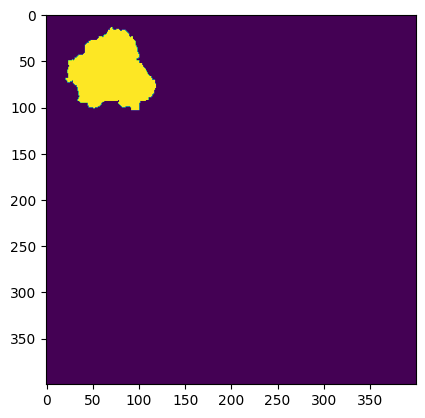

In [6]:
import torch
import cv2
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/Users/aymane/School/Senior Design/pothole-localization/data/segmentation/raw/label/601.png')
  
# Convert BGR image to RGB image
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  
# Define a transform to convert
# the image to torch tensor
transform = transforms.Compose([
    transforms.ToTensor()
])
  
# Convert the image to Torch tensor
tensor = transform(image)
  
# print the converted image tensor
print(tensor.shape)

plt.imshow(image)
plt.show()